## Import Libraries

### Standard Libraries

In [ ]:
!pip install pipreqs


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [7]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [2]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


## Load and Explore the Dataset

In [9]:
df = pd.read_csv("diabetes.csv")
df.describe(include="all")

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant            768 non-null int64
Plasma glucose concentration        768 non-null int64
Diastolic blood pressure (mm Hg)    768 non-null int64
Triceps skin fold thickness (mm)    768 non-null int64
2-Hour serum insulin (mu U/ml)      768 non-null int64
Body mass index                     768 non-null float64
Diabetes pedigree function          768 non-null float64
Age                                 768 non-null int64
Class                               768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)', 'Body mass index',
       'Diabetes pedigree function', 'Age', 'Class'],
      dtype='object')

## Build the Model

In [12]:
#Separate the Features and the Target Variable

# X = df.drop(["Class"], axis=1)
X = df[['Age', 'Body mass index', 'Plasma glucose concentration']]
y = df["Class"]

In [15]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 3), (192, 3), (576,), (192,))

### Scaling the Dataset

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">**Standard Scaler**</a>

In [9]:
# #Instantiate the Standard Scaler

# scaler = StandardScaler()

# #Fit the scaler to the training set
# scaler.fit(X_train)

# #Transform the training set
# X_train_scaled = scaler.transform(X_train)

# #Transform the test set
# X_test_scaled = scaler.transform(X_test)

In [10]:
# #Change to Pandas dataframe for easier viewing and manipulation of the data
# X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
# X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [17]:
# X_train_sdf

### Train the Model

<a href="https://scikit-learn.org/stable/modules/naive_bayes.html">**Naive Bayes**</a>

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Instantiate the Algorithm 
rf = RandomForestClassifier()

#Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Validate the Model

In [22]:
#Predict on the Test Set
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
age = 18
bmi = 27
plasma = 50

rf.predict([[age, bmi, plasma]])[0]

0

In [33]:
# Save Model
# from sklearn.externals import joblib
import joblib
filename = 'finalized_model2.sav'
joblib.dump(rf, filename)

['finalized_model2.sav']

In [34]:
# Load model suing joblib
saved_model = joblib.load('finalized_model2.sav')

#Predict
predict_diabetes = saved_model.predict([[age, bmi, plasma]])[0]

In [35]:
predict_diabetes

0

In [29]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FC03-88F5

 Directory of C:\Users\user\Desktop\DS Files\DS2\DAY 7 - Classification Algorithms

10 Dec 2019  03:00 PM    <DIR>          .
10 Dec 2019  03:00 PM    <DIR>          ..
15 Jun 2019  04:05 PM    <DIR>          .ipynb_checkpoints
05 Nov 2019  02:59 PM           115,126 Analytiks_FTW_Lab7_a_LogisticRegression-Churn.ipynb
18 Jun 2019  04:05 PM            43,885 Analytiks_FTW_Lab7_b_KNN-MNIST-Elyse.ipynb
05 Nov 2019  08:49 PM            90,406 Analytiks_FTW_Lab7_b_KNN-MNIST.ipynb
10 Dec 2019  03:00 PM            77,424 Analytiks_FTW_Lab7_c_NaiveBayes-Diabetes.ipynb
05 Nov 2019  08:53 PM           129,070 Analytiks_FTW_Lab7_d_DecisionTree-Lymphography.ipynb
15 Jun 2019  10:31 AM           991,773 Churn_Cleaned.csv
15 Jun 2019  10:31 AM            23,213 diabetes.csv
05 Nov 2019  09:06 PM            20,306 Exercise - Mobile Price Train.ipynb
15 Jun 2019  04:04 PM           221,747 Exercise Mobile Train - Naive Bayes.ipynb
10 Dec 201

In [23]:
#Check performance metrics
print(accuracy_score(y_test,y_pred))

0.6979166666666666


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

   micro avg       0.73      0.73      0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



In [17]:
print (confusion_matrix(y_test, y_pred))

[[94 29]
 [22 47]]


Text(0.5,23.5,'Predicted label')

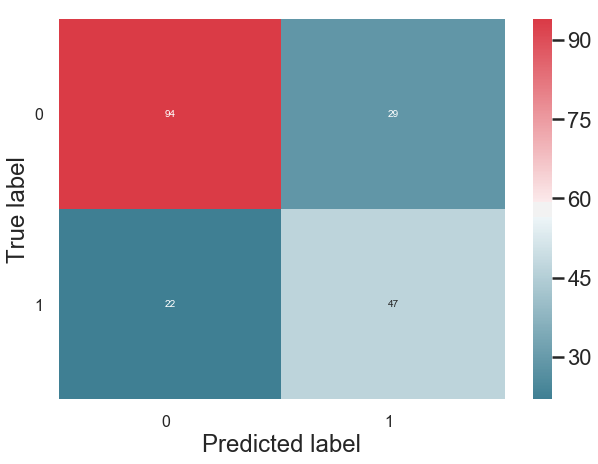

In [18]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Create Report

In [19]:
#View original test dataset with results for easier analysis
df_results = X_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred

In [20]:
df_results.head(10)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class,Predicted
668,6,98,58,33,190,34.0,0.430,43,0,0
324,2,112,75,32,0,35.7,0.148,21,0,0
624,2,108,64,0,0,30.8,0.158,21,0,0
690,8,107,80,0,0,24.6,0.856,34,0,0
473,7,136,90,0,0,29.9,0.210,50,0,1
204,6,103,72,32,190,37.7,0.324,55,0,1
97,1,71,48,18,76,20.4,0.323,22,0,0
336,0,117,0,0,0,33.8,0.932,44,0,1
568,4,154,72,29,126,31.3,0.338,37,0,0
148,5,147,78,0,0,33.7,0.218,65,0,1
